In [16]:
#import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
plt.style.use('ggplot')

In [2]:
file = pd.read_csv('data/whisky.csv')

In [3]:
file.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140


In [4]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RowID       86 non-null     int64 
 1   Distillery  86 non-null     object
 2   Body        86 non-null     int64 
 3   Sweetness   86 non-null     int64 
 4   Smoky       86 non-null     int64 
 5   Medicinal   86 non-null     int64 
 6   Tobacco     86 non-null     int64 
 7   Honey       86 non-null     int64 
 8   Spicy       86 non-null     int64 
 9   Winey       86 non-null     int64 
 10  Nutty       86 non-null     int64 
 11  Malty       86 non-null     int64 
 12  Fruity      86 non-null     int64 
 13  Floral      86 non-null     int64 
 14  Postcode    86 non-null     object
 15  Latitude    86 non-null     int64 
 16  Longitude   86 non-null     int64 
dtypes: int64(15), object(2)
memory usage: 11.5+ KB


In [5]:
file.drop(['RowID', 'Postcode', 'Latitude', 'Longitude'], axis=1, inplace=True)

In [6]:
file.isnull().sum()

Distillery    0
Body          0
Sweetness     0
Smoky         0
Medicinal     0
Tobacco       0
Honey         0
Spicy         0
Winey         0
Nutty         0
Malty         0
Fruity        0
Floral        0
dtype: int64

In [7]:
def unique_values(df):
    for col in df.columns:
        print(df[col].unique())

In [8]:
unique_values(file)

['Aberfeldy' 'Aberlour' 'AnCnoc' 'Ardbeg' 'Ardmore' 'ArranIsleOf'
 'Auchentoshan' 'Auchroisk' 'Aultmore' 'Balblair' 'Balmenach' 'Belvenie'
 'BenNevis' 'Benriach' 'Benrinnes' 'Benromach' 'Bladnoch' 'BlairAthol'
 'Bowmore' 'Bruichladdich' 'Bunnahabhain' 'Caol Ila' 'Cardhu' 'Clynelish'
 'Craigallechie' 'Craigganmore' 'Dailuaine' 'Dalmore' 'Dalwhinnie'
 'Deanston' 'Dufftown' 'Edradour' 'GlenDeveronMacduff' 'GlenElgin'
 'GlenGarioch' 'GlenGrant' 'GlenKeith' 'GlenMoray' 'GlenOrd' 'GlenScotia'
 'GlenSpey' 'Glenallachie' 'Glendronach' 'Glendullan' 'Glenfarclas'
 'Glenfiddich' 'Glengoyne' 'Glenkinchie' 'Glenlivet' 'Glenlossie'
 'Glenmorangie' 'Glenrothes' 'Glenturret' 'Highland Park' 'Inchgower'
 'Isle of Jura' 'Knochando' 'Lagavulin' 'Laphroig' 'Linkwood'
 'Loch Lomond' 'Longmorn' 'Macallan' 'Mannochmore' 'Miltonduff' 'Mortlach'
 'Oban' 'OldFettercairn' 'OldPulteney' 'RoyalBrackla' 'RoyalLochnagar'
 'Scapa' 'Speyburn' 'Speyside' 'Springbank' 'Strathisla' 'Strathmill'
 'Talisker' 'Tamdhu' 'Tamn

In [10]:
corr = file.corr()
corr.style.background_gradient(cmap='coolwarm')

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375
Honey,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029
Spicy,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663
Winey,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932
Nutty,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302
Malty,-0.116859,-0.001516,-0.192875,-0.258959,-0.059347,0.310184,0.036303,0.112368,0.066157,1.000000,0.207288,0.106309


In [12]:
# convert categorical variables into integers
X = file
y = file['Distillery']

le = LabelEncoder()
X['Distillery'] = le.fit_transform(X['Distillery'])
y = le.transform(y)

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Distillery  86 non-null     int64
 1   Body        86 non-null     int64
 2   Sweetness   86 non-null     int64
 3   Smoky       86 non-null     int64
 4   Medicinal   86 non-null     int64
 5   Tobacco     86 non-null     int64
 6   Honey       86 non-null     int64
 7   Spicy       86 non-null     int64
 8   Winey       86 non-null     int64
 9   Nutty       86 non-null     int64
 10  Malty       86 non-null     int64
 11  Fruity      86 non-null     int64
 12  Floral      86 non-null     int64
dtypes: int64(13)
memory usage: 8.9 KB


In [17]:
# feature scaling
cols = X.columns
scaler = MinMaxScaler()
X = scaler.fit_transform(X) 

In [18]:
X = pd.DataFrame(X, columns=[cols])

In [19]:
# Fit K-means model
k_means = KMeans(n_clusters=2, random_state=0)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [21]:
# model parameters

k_means.inertia_

54.017381445026345

In [23]:
# Quality of classification by model
labels = k_means.labels_
correct_labels = sum(y==labels)
print('Results: %d out of %d samples were correctly labeled.' %(correct_labels, y.size))

Results: 1 out of 86 samples were correctly labeled.


In [24]:
print('Accuracy score: {0:0.2f}'.format(correct_labels/float(y.size)))

Accuracy score: 0.01


The model has a weak classification accuracy of 1%  

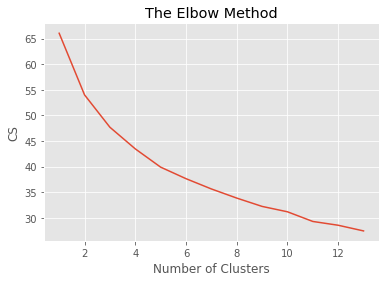

In [25]:
# Apply Elbow Method to find optimal number of clusters
cs = []
for i in range(1, 14):
    k_means = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    k_means.fit(X)
    cs.append(k_means.inertia_)
plt.plot(range(1,14), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CS')
plt.show()